<a href="https://colab.research.google.com/github/Atul-cyber2004/NICSI-PROJ2/blob/main/realdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded= files.upload()

Saving seed_2025.csv to seed_2025.csv


Total forecasted surplus (lakh quintals): 55.46
Total forecasted deficit (lakh quintals): 2.37
✅ Surplus states CAN offset the deficit of other states.

📈 Surplus States:
                State  Surplus
1             HARYANA     8.71
2              PUNJAB     7.27
3      ANDHRA PRADESH     6.20
4          TELANAGANA     6.15
5           KARNATAKA     5.35
6           RAJASTHAN     4.30
7         MAHARASHTRA     4.24
8         WEST BENGAL     3.21
9               BIHAR     2.50
10     MADHYA PRADESH     1.92
11            GUJARAT     1.33
12      UTTAR PRADESH     1.29
13              ASSAM     1.18
14       CHHATTISGARH     0.70
15        UTTARAKHAND     0.65
16      JAMMU&KASHMIR     0.18
17          TAMILNADU     0.07
18          MEGHALAYA     0.07
19   HIMACHAL PRADESH     0.05
20            TRIPURA     0.03
21             ODISHA     0.02
22                GOA     0.01
23  ARUNACHAL PRADESH     0.01
24            MANIPUR     0.01
25             KERALA     0.01

📉 Deficit States:
    

/tmp/ipython-input-8-4239605744.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=surplus, x='State', y='Surplus', palette='Greens')
/tmp/ipython-input-8-4239605744.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=deficit, x='State', y=-deficit['Surplus'], palette='Reds')


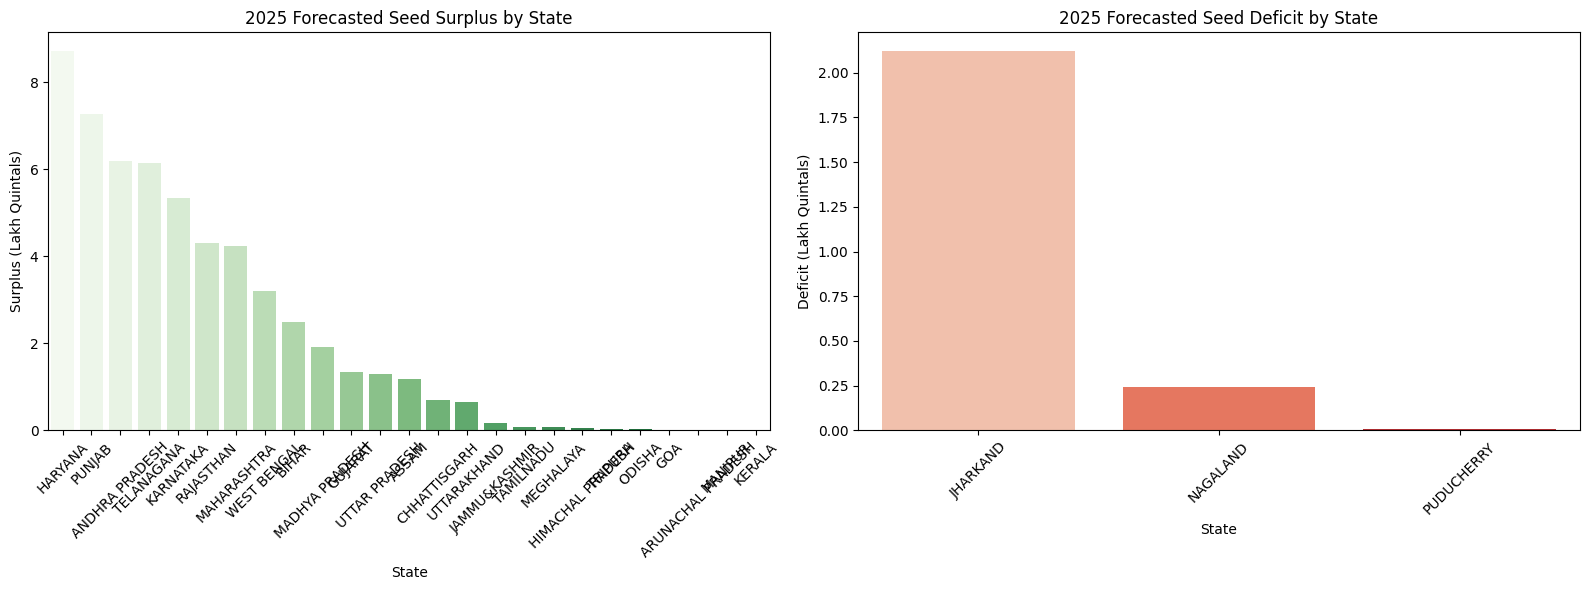

In [8]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load CSV File
data = pd.read_csv('seed_2025.csv')

# ➕ Calculate Surplus
data['Surplus'] = data['2025_Availability_Prediction'] - data['2025_Demand_Prediction']

# 🧮 Separate Surplus and Deficit States
surplus = data[data['Surplus'] > 0].sort_values(by='Surplus', ascending=False)
deficit = data[data['Surplus'] < 0].sort_values(by='Surplus')

# Reset index for clean display
surplus.index = range(1, len(surplus) + 1)
deficit.index = range(1, len(deficit) + 1)

# 📊 Total Surplus/Deficit
total_surplus = surplus['Surplus'].sum()
total_deficit = -deficit['Surplus'].sum()

# 📢 Print Summary
print("Total forecasted surplus (lakh quintals):", round(total_surplus, 2))
print("Total forecasted deficit (lakh quintals):", round(total_deficit, 2))

if total_surplus >= total_deficit:
    print("✅ Surplus states CAN offset the deficit of other states.")
else:
    print("❌ Surplus states CANNOT offset the deficit of other states.")

# 📋 Print Tables
print("\n📈 Surplus States:")
print(surplus[['State', 'Surplus']])

print("\n📉 Deficit States:")
print(deficit[['State', 'Surplus']])

# 📊 Combined Plot: Surplus and Deficit Bar Charts
plt.figure(figsize=(16, 6))

# Plot 1 - Surplus States
plt.subplot(1, 2, 1)
sns.barplot(data=surplus, x='State', y='Surplus', palette='Greens')
plt.title("2025 Forecasted Seed Surplus by State")
plt.xlabel("State")
plt.ylabel("Surplus (Lakh Quintals)")
plt.xticks(rotation=45)

# Plot 2 - Deficit States
plt.subplot(1, 2, 2)
sns.barplot(data=deficit, x='State', y=-deficit['Surplus'], palette='Reds')
plt.title("2025 Forecasted Seed Deficit by State")
plt.xlabel("State")
plt.ylabel("Deficit (Lakh Quintals)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
